# <div dir="rtl">سوال پنجم:</div>

In [1]:
%cd drive/MyDrive/FDM

/content/drive/MyDrive/FDM


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
machine_data = pd.read_csv("machines.csv", index_col=None, header=None).drop(0, axis=1)
machine_data = machine_data.rename(columns={1: '‫‪Vendor_name', 2: 'model', 3: 'MCYT', 4: 'MMIN', 5: 'MMAX', 
                                            6: 'CACH', 7: 'CHMIN', 8: 'CHMAX', 9: 'PRP', 10: 'ERP'})

# <div dir="rtl">قسمت a:</div>

<div dir="rtl">

در این قسمت خواسته شده وجود outlierها را با رسم boxplot مشخص کنیم.

به ترتیب برای هشت ستون عددی داده boxplot ها را رسم کردم.

مشاهده میشود خارج از بخش اصلی دادگان همواره نقاط سیاهی مشخص شده اند که نشاندهنده ی داده های پرت برای هر ویژگی هستند. در این نمودار ها مقدار و محل تجمع داده ها مشخص شده است.

<div>

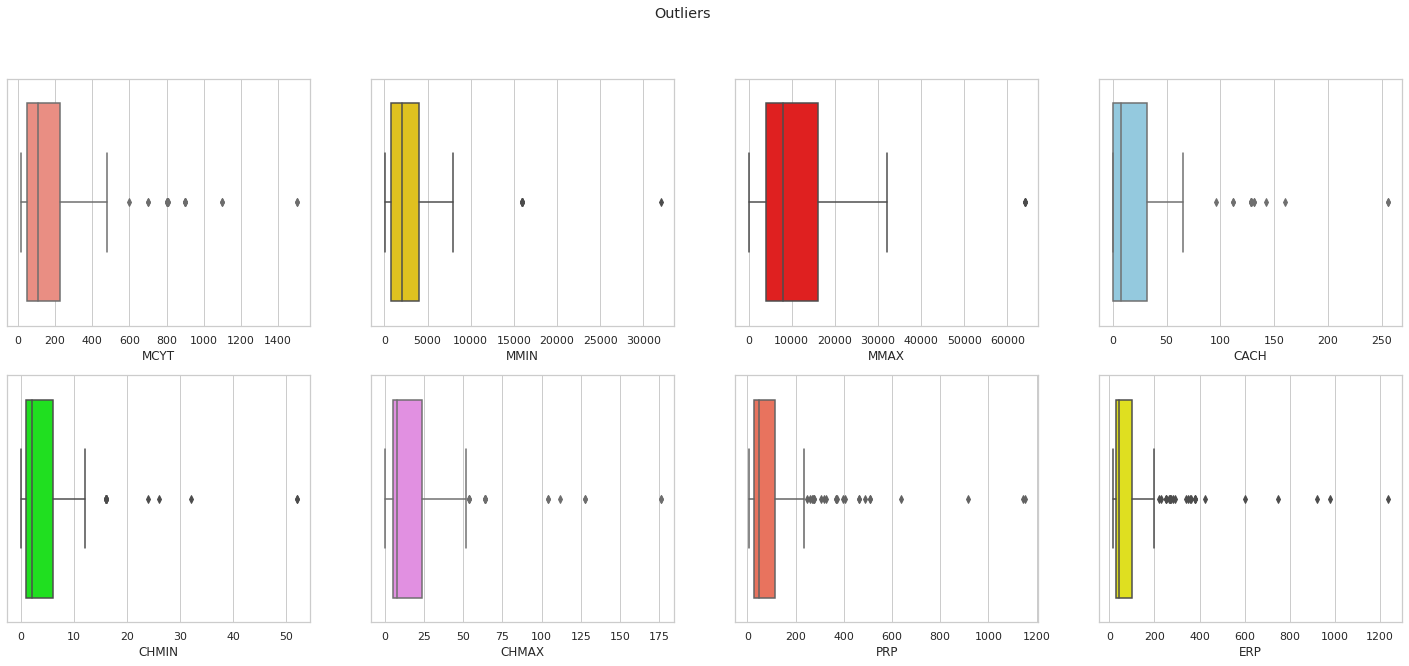

In [4]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 4, figsize=(25, 10), sharey=True)
fig.suptitle('Outliers')

sns.boxplot(ax=axes[0,0], x=machine_data["MCYT"], color='salmon')
sns.boxplot(ax=axes[0,1], x=machine_data["MMIN"], color='gold')
sns.boxplot(ax=axes[0,2], x=machine_data["MMAX"], color='red')
sns.boxplot(ax=axes[0,3], x=machine_data["CACH"], color='skyblue')
sns.boxplot(ax=axes[1,0], x=machine_data["CHMIN"], color='lime')
sns.boxplot(ax=axes[1,1], x=machine_data["CHMAX"], color='violet')
sns.boxplot(ax=axes[1,2], x=machine_data["PRP"], color='tomato')
sns.boxplot(ax=axes[1,3], x=machine_data["ERP"], color='yellow')
plt.show()

# <div dir="rtl">قسمت b:</div>

<div dir="rtl">

در این قسمت ابتدا با استفاده از تبدیل z-score داده ها را تبدیل میکنم و درون دیتافریمی با همین نام میریزم.

سپس مقادیر مینیمم و ماکزیمم را برای هر ستون بعد از تبدیل زد حساب میکنم.

سپس از این دیتافریم داده هایی که مقدار آنها کمتر از 3 و بیشتر از -3 باشد را مشخص میکنم و داخل دیتافریم جدیدی به نام df1 میریزم.

برای اینکه مشخص کنیم چه تعداد از سطور حذف شده اند شکل داده اولیه و ثانویه را چاپ میکنیم که برابر با 209 و 188 هست پس نتیجه میگیریم که 21 سطر به عنوان outlier شناخته شده و حذف شده اند.

نهایتا دوباره مقدار مینیمم و ماکزیمم مقادیر هر سطر را مشخص میکنیم و از حذف مقادیر outlier اطمینن میابیم.

<div>

In [5]:
df_zscored = machine_data.select_dtypes(include='number').apply(stats.zscore)
df_zscored.head()

,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,-0.303586,-0.675026,-0.495462,5.696280,1.661989,4.231033,0.575759,0.645587
1,-0.673330,1.326291,1.727049,0.167606,0.485509,0.529479,1.018277,0.995359
2,-0.673330,1.326291,1.727049,0.167606,0.485509,0.529479,0.712877,0.995359
3,-0.673330,1.326291,1.727049,0.167606,0.485509,0.529479,0.413710,0.995359
4,-0.673330,1.326291,0.359350,0.167606,0.485509,-0.087447,0.164405,0.211611


In [6]:
df_zscored.min(), df_zscored.max()

(MCYT    -0.719547
 MMIN    -0.724645
 MMAX    -1.002879
 CACH    -0.621852
 CHMIN   -0.690971
 CHMAX   -0.704373
 PRP     -0.620909
 ERP     -0.546228
 dtype: float64, MCYT     4.992217
 MMIN     7.528719
 MMAX     4.462448
 CACH     5.696280
 CHMIN    6.956148
 CHMAX    6.081811
 PRP      6.509238
 ERP      7.375453
 dtype: float64)

In [7]:
cdf1 = df_zscored[~((df_zscored < (-3)) |(df_zscored > (3))).any(axis=1)]
machine_data.shape, cdf1.shape

((209, 10), (188, 8))

In [8]:
cdf1.min(), cdf1.max()

(MCYT    -0.719547
 MMIN    -0.724645
 MMAX    -1.002879
 CACH    -0.621852
 CHMIN   -0.690971
 CHMAX   -0.704373
 PRP     -0.620909
 ERP     -0.546228
 dtype: float64, MCYT     2.681321
 MMIN     1.326291
 MMAX     1.727049
 CACH     2.881369
 CHMIN    2.838468
 CHMAX    1.763330
 PRP      1.865917
 ERP      1.830924
 dtype: float64)

# <div dir="rtl">قسمت c:</div>

<div dir="rtl">

در این قسمت خواسته شده است که داده ها را به روش IQR تمیز کنیم.

ابتدا سطح آستانه اول و سوم را میابیم و با محاسبه Q3-Q1 مقدار IQR را محاسبه میکنیم.

سپس ناحیه مجاز برای مقدار ستونها را مشخص میکنیم و داده هایی که این شرایط را دارند را در دیتافریم df2 میریزیم و اگر یکی از مقادیر ستونها این شرایط را نقض کند کل سطر را پاک میکنیم.

نهایتا برای اینکه مخشص کنیم چه تعداد از سطر ها حذف شده اند شکل اولیه و ثانیه داده ها رامشاهده میکنیم. میبینیم از 209 سطر به 149 سطر رسیده ایم پس متوجه میشویم 60 سطر از داده ها حذف شده اند.

<div>

In [9]:
Q1 = machine_data.quantile(0.25)
Q3 = machine_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MCYT       175.0
MMIN      3232.0
MMAX     12000.0
CACH        32.0
CHMIN        5.0
CHMAX       19.0
PRP         86.0
ERP         73.0
dtype: float64


In [10]:
cdf2 = machine_data[~((machine_data < (Q1 - 1.5 * IQR)) |(machine_data > (Q3 + 1.5 * IQR))).any(axis=1)]
machine_data.shape, cdf2.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


((209, 10), (149, 10))